In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform
Fourier Transform is used to decompose an image into its sine and cosine components. The output of the transformation represents the image in the Fourier or frequency domain, while the input image is the spatial domain equivalent. In the Fourier domain image, each point represents a particular frequency contained in the spatial domain image. It's used for image filtering, compression etc.

We mostly use <b>DFT</b> (Discrete Fourier Transform), which is sample fourier transform and thus, doesn't contain all the frequencies, but only a set of samples which is large enough to describe the spatial domain information.

For an image of nxm dimensions, 2-D DFT is given by
$$F(k, l) = \sum_{i=0}^{n-1}\sum_{j=0}^{m-1}f(i, j)e^{-i2\pi(\frac{ki}{n} + \frac{lj}{m})}$$

Inverse transform is given by
$$f(a, b) = \frac{1}{n*m}\sum_{k=0}^{n-1}\sum_{l=0}^{m-1}F(k, l)e^{i2\pi(\frac{ka}{n} + \frac{lb}{m})}$$

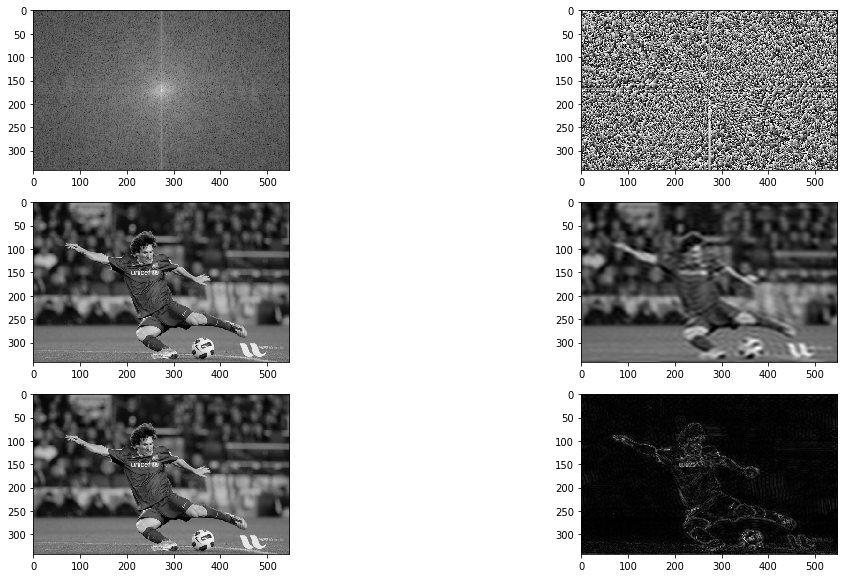

In [2]:
image = cv2.imread("../resources/messi.jpg", cv2.IMREAD_GRAYSCALE)

fig = plt.figure()
fig.set_size_inches(18, 10)

dft = np.fft.fftshift(cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT))
# magnitude_spectrum = 20*np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]))
# phase_spectrum = cv2.phase(dft[:,:,0], dft[:,:,1])
magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft[:,:,0], dft[:,:,1])
magnitude_spectrum = 20*np.log(magnitude_spectrum)

fig.add_subplot(3, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
fig.add_subplot(3, 2, 2)
plt.imshow(phase_spectrum, cmap='gray')

# Applying Low Pass Filter => Removes high frequencies (noise)
rows, cols = image.shape
center = rows/2, cols/2
mask = np.zeros((rows, cols, 2), np.uint8)
# low pass filter => 1 at low frequency and 0 at high frequency
mask[center[0] - 30:center[0] + 30, center[1] - 30:center[1] + 30] = 1

filtered = dft*mask
inv = cv2.idft(np.fft.ifftshift(filtered))
inv_mag = cv2.magnitude(inv[:,:,0], inv[:,:,1])
fig.add_subplot(3, 2, 3)
plt.imshow(image, cmap='gray')
fig.add_subplot(3, 2, 4)
plt.imshow(inv_mag, cmap='gray')

# Applying high pass filter
dft[center[0] - 30:center[0] + 30, center[1] - 30:center[1] + 30] = 0
inv = cv2.idft(np.fft.ifftshift(dft))
inv_mag = cv2.magnitude(inv[:,:,0], inv[:,:,1])
fig.add_subplot(3, 2, 5)
plt.imshow(image, cmap='gray')
fig.add_subplot(3, 2, 6)
plt.imshow(inv_mag, cmap='gray')

plt.show()

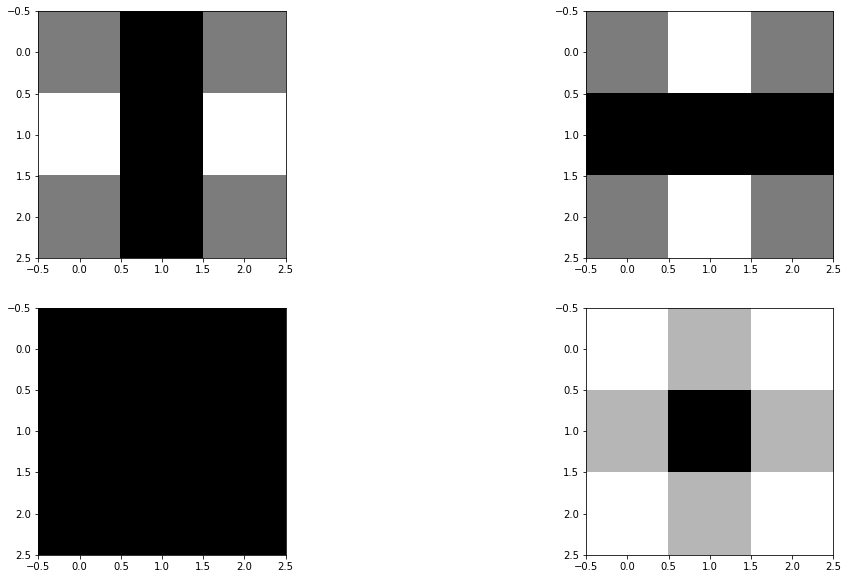

In [3]:
# Representation of some important kernels

gauss = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

fig = plt.figure()
fig.set_size_inches(18, 10)

kernels = [sobel_x, sobel_y, gauss, laplacian]
for i in range(4):
    dft = np.fft.fftshift(cv2.dft(np.float32(kernels[i]), flags=cv2.DFT_COMPLEX_OUTPUT))
    magnitude = np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]) + 1)
    fig.add_subplot(2, 2, i+1)
    plt.imshow(magnitude, cmap='gray')

plt.show()

## Applications of Fourier Transforms
1. Foresnic Image Analysis
<img src="../resources/fourier1.png">
2. Removing Fluctuations
<img src="../resources/fourier2.png">

# Hough Transform
It's a feature extraction technique. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure.

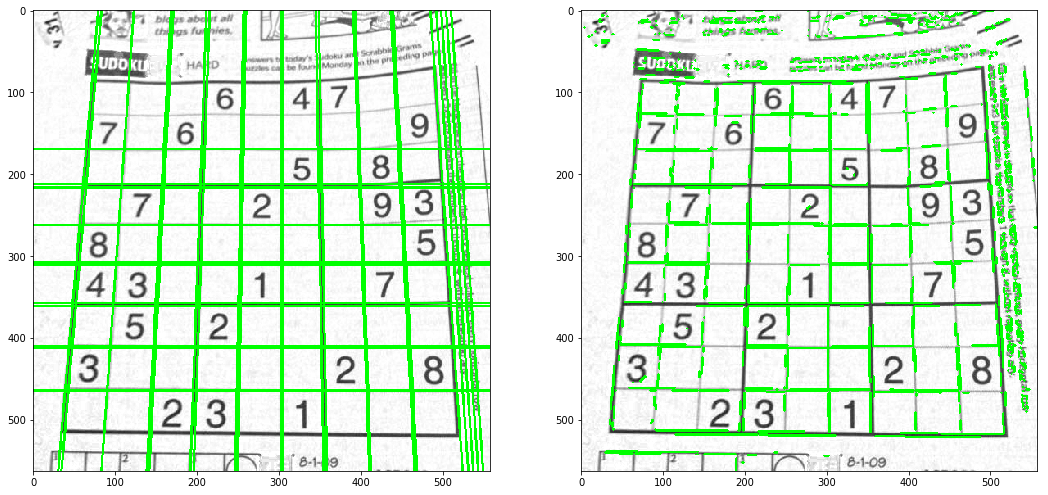

In [4]:
# Hough Line Transform

image = cv2.imread("../resources/sudoku1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
copy = image.copy()

fig = plt.figure()
fig.set_size_inches(18, 10)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
for line in lines:
    for radius, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * radius
        y0 = b * radius
        x1 = int(x0 + 1000 * (-b))
        x2 = int(x0 - 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        y2 = int(y0 - 1000 * a)

        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

fig.add_subplot(1, 2, 1)
plt.imshow(image)

edges = cv2.Canny(gray, 50, 150)
min_length = 90
max_gap = 18
lines = cv2.HoughLinesP(edges, 1, np.pi/180, min_length, max_gap)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

fig.add_subplot(1, 2, 2)
plt.imshow(copy)
plt.show()

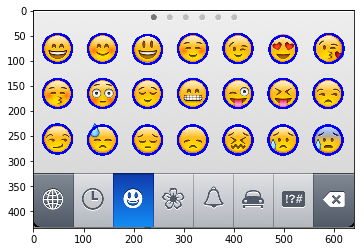

In [5]:
# Hough Circle Transform
image = cv2.imread("../resources/template_test.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(gray, 100, 200)

circles = cv2.HoughCircles(edges, cv2.cv.CV_HOUGH_GRADIENT, 1, 10, param1=200, param2=90)
circles = np.uint(np.around(circles))

for circle in circles:
    for center_x, center_y, radius in circle:
        cv2.circle(image, (center_x, center_y), radius, (255, 0, 0), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Template Matching
Searching and finding the location of a template image in a larger image.

Matching Methods Available:
1. cv2.TM_SQDIFF
2. cv2.TM_SQDIFF_NORMED
3. cv2.TM_CCORR
4. cv2.TM_CCORR_NORMED
5. cv2.TM_CCOEFF
6. cv2.TM_CCOEFF_NORMED

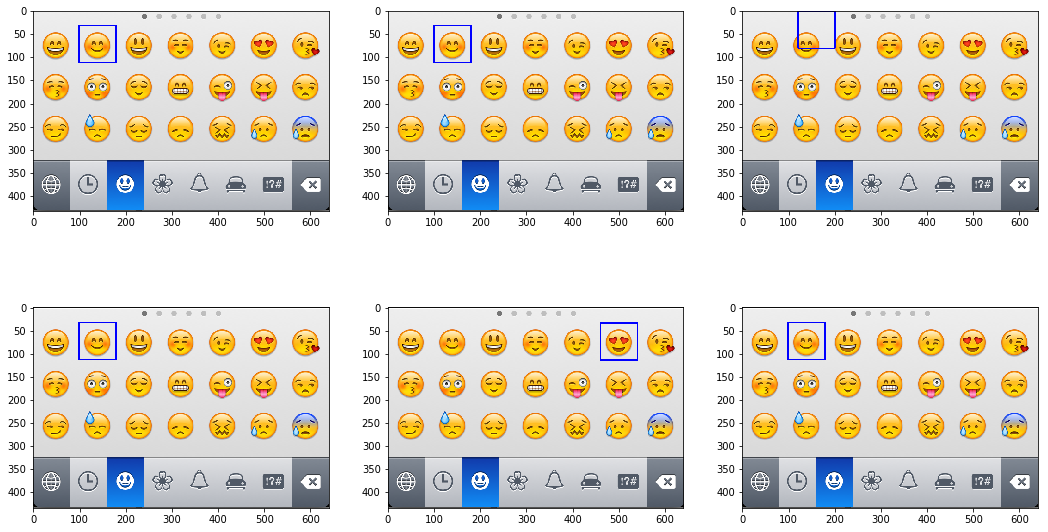

In [6]:
image = cv2.imread("../resources/template_test.png")
template = cv2.imread("../resources/emoji.png")
template = cv2.resize(template, (80, 80))
w, h = template.shape[:2][::-1]

fig = plt.figure()
fig.set_size_inches(18, 10)

for method in range(6):
    copy = image.copy()
    match = cv2.matchTemplate(copy, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(copy, top_left, bottom_right, (255, 0, 0), 2)
    fig.add_subplot(2, 3, method+1)
    plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))
plt.show()

## Distance Transform
An operator that transforms the values of pixels in an image according to their distance from the boundary of the object. Farther the pixel from the boundary, higher the value it gets. This results in a shrinked image (boundary pixels -> black, pixels near center -> white).

Applications:
- Generating skeleton of images (connectivity, length and width).
- Navigation and pathfinding

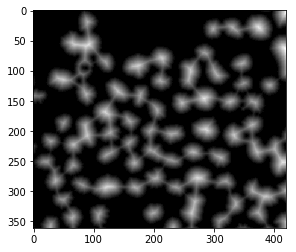

In [7]:
image = cv2.imread("../resources/cells.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
# plt.imshow(thresh, cmap='gray')
# plt.show()
distance = cv2.distanceTransform(thresh, cv2.cv.CV_DIST_L2, 5)
plt.imshow(distance, cmap='gray')
plt.show()

# Watershed Transformation
The term watershed refers to a ridge that divides areas drained by different river systems. Computer analysis of image objects starts with finding them-deciding which pixels belong to each object. This is called image segmentation, the process of separating objects from the background, as well as from each other.

Understanding the watershed transform requires that you think of an image(grayscale) as a topographic surface where high intensity denotes peaks and low intensity denotes valleys Every local minima is filled with different color.

Things we should know before continuing:
1. Thresholding
2. Morphological Operations
3. Distance Transform

Applications:
- Used to monitor traffic. It automatically segments the lanes of a road to count the number of vehicles on different lanes.
- Detecting fractures in surface of steel.

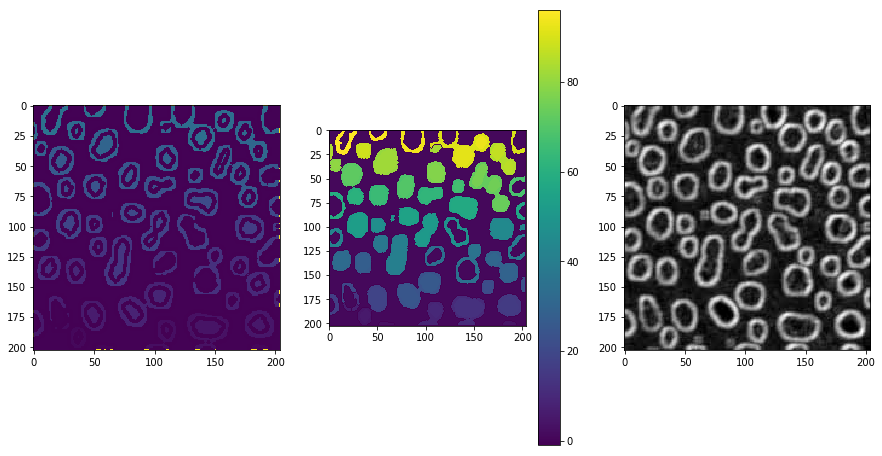

In [8]:
image = cv2.imread("../resources/watershed_test.jpg")
# Segmentation needs a grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# contours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(image, contours, -1, (0, 0, 255), 1)

kernel = np.ones((3, 3))
# opening is done to remove small noises
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# controlling dilation iteration provides us with region where we are sure that object doesn't exists.
background = cv2.dilate(opening, kernel, iterations=2)

# Approximate the actual object regions using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.cv.CV_DIST_L2, 5)
ret, foreground = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, cv2.THRESH_BINARY)

background = np.uint8(background)
foreground = np.uint8(foreground)

# We have background and foreground, now we need to find whether remaining region belongs to our object or not.
# These regions are borders (common to both foreground and background)
unknown = cv2.subtract(background, foreground)

# We mark the sure regions with incrementing labels, and the unknown regions with 0
# For opencv 2.x.x
####
contours, hierarchy = cv2.findContours(foreground, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
markers = np.zeros(gray.shape, dtype=np.int32)
markers = np.int32(background) + np.int32(foreground)
for idx in range(len(contours)):
    cv2.drawContours(markers, contours, idx, idx+2, -1)
####
# For opencv 3.x.x
####
# ret, markers = cv2.connectedComponents(foreground)
####
markers += 1
markers[unknown == 255] = 0

fig = plt.figure()
fig.set_size_inches(15, 8)

fig.add_subplot(1, 3, 1)
plt.imshow(markers)

cv2.watershed(image, markers)
image[markers == -1] = (0, 0, 255)

fig.add_subplot(1, 3, 2)
plt.imshow(markers)
plt.colorbar()
fig.add_subplot(1, 3, 3)
plt.imshow(gray, cmap='gray')
plt.show()